<a href="https://colab.research.google.com/github/gaurav1610/Coursera_Capstone/blob/master/CAPSTONE_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing Library**

In [425]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

/bin/bash: conda: command not found
/bin/bash: conda: command not found
Libraries imported.


### Importing and exploring Dataset

### Dataset1

In [0]:
newyork=pd.read_csv('nyc-rolling-sales.csv')

In [515]:
newyork.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [0]:
NEWYORK=newyork[['Unnamed: 0','NEIGHBORHOOD','BUILDING CLASS CATEGORY','SALE PRICE','YEAR BUILT']]

In [0]:
NEWYORK=NEWYORK.rename(columns={'Unnamed: 0':'HousingID','NEIGHBORHOOD':'Neighborhood'})

In [429]:
NEWYORK.head()

,HousingID,Neighborhood,BUILDING CLASS CATEGORY,SALE PRICE,YEAR BUILT
0,4,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,6625000,1900
1,5,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,-,1900
2,6,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,-,1900
3,7,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,3936272,1913
4,8,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,8000000,1900


### Dropping the row with Nan value

In [0]:
NEWYORK['SALE PRICE']=NEWYORK['SALE PRICE'].str.replace('-','0').astype(int)

In [0]:
indexNames = NEWYORK[NEWYORK['SALE PRICE'] == 0].index
NEWYORK.drop(indexNames , inplace=True)

In [0]:
NEWYORK.columns=['HousingID','Neighborhood','BUILDING_CLASS_CATEGORY','SALE_PRICE','YEAR_BUILT']

In [433]:
NEWYORK.head()

,HousingID,Neighborhood,BUILDING_CLASS_CATEGORY,SALE_PRICE,YEAR_BUILT
0,4,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,6625000,1900
3,7,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,3936272,1913
4,8,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,8000000,1900
6,10,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,3192840,1920
9,13,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,16232000,1920


## Dataset2

In [434]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [0]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [0]:
neighborhoods_data = newyork_data['features']

In [0]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [438]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [0]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

Neighborhood of NEWYORK is in Upper case

In [0]:
neighborhoods['Neighborhood']=neighborhoods.Neighborhood.str.upper()

## Merging two Dataframe on Neighborhood

Getting how many of Neighborhood are not in other dataset

In [441]:
set(NEWYORK.Neighborhood)-set(neighborhoods.Neighborhood)

{'AIRPORT LA GUARDIA',
 'ALPHABET CITY',
 'ARROCHAR-SHORE ACRES',
 'BATHGATE',
 'BEDFORD PARK/NORWOOD',
 'BRONX PARK',
 'BUSH TERMINAL',
 'CASTLE HILL/UNIONPORT',
 'CITY ISLAND-PELHAM STRIP',
 'CLOVE LAKES',
 'COBBLE HILL-WEST',
 'CONCORD-FOX HILLS',
 'CROTONA PARK',
 'DONGAN HILLS-COLONY',
 'DONGAN HILLS-OLD TOWN',
 'DOWNTOWN-FULTON FERRY',
 'DOWNTOWN-FULTON MALL',
 'DOWNTOWN-METROTECH',
 'EAST RIVER',
 'FASHION',
 'FINANCIAL',
 'FLATBUSH-CENTRAL',
 'FLATBUSH-EAST',
 'FLATBUSH-LEFFERTS GARDEN',
 'FLATBUSH-NORTH',
 'FLUSHING MEADOW PARK',
 'FLUSHING-NORTH',
 'FLUSHING-SOUTH',
 'FRESH KILLS',
 'GREAT KILLS-BAY TERRACE',
 'GREENWICH VILLAGE-CENTRAL',
 'GREENWICH VILLAGE-WEST',
 'HARLEM-CENTRAL',
 'HARLEM-EAST',
 'HARLEM-UPPER',
 'HARLEM-WEST',
 'HIGHBRIDGE/MORRIS HEIGHTS',
 'HOLLIS HILLS',
 'JAMAICA',
 'JAMAICA BAY',
 'JAVITS CENTER',
 'KINGSBRIDGE HTS/UNIV HTS',
 'KINGSBRIDGE/JEROME PARK',
 'KIPS BAY',
 'LIVINGSTON',
 'MARINERS HARBOR',
 'MELROSE/CONCOURSE',
 'MIDTOWN CBD',
 'MIDTOWN EA

In [442]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,WAKEFIELD,40.894705,-73.847201
1,Bronx,CO-OP CITY,40.874294,-73.829939
2,Bronx,EASTCHESTER,40.887556,-73.827806
3,Bronx,FIELDSTON,40.895437,-73.905643
4,Bronx,RIVERDALE,40.890834,-73.912585


In [0]:
newyork1=pd.merge(NEWYORK,neighborhoods,on='Neighborhood',how='outer')

In [444]:
newyork1.head()

,HousingID,Neighborhood,BUILDING_CLASS_CATEGORY,SALE_PRICE,YEAR_BUILT,Borough,Latitude,Longitude
0,4.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,6625000.0,1900.0,NaN,NaN,NaN
1,7.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,3936272.0,1913.0,NaN,NaN,NaN
2,8.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,8000000.0,1900.0,NaN,NaN,NaN
3,10.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,3192840.0,1920.0,NaN,NaN,NaN
4,13.0,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,16232000.0,1920.0,NaN,NaN,NaN


## Dropping any row with Nan value

In [0]:
newyork1=newyork1.dropna(how='any')

In [446]:
newyork1.head()

,HousingID,Neighborhood,BUILDING_CLASS_CATEGORY,SALE_PRICE,YEAR_BUILT,Borough,Latitude,Longitude
148,210.0,CHELSEA,01 ONE FAMILY DWELLINGS,7425000.0,1901.0,Manhattan,40.744035,-74.003116
149,210.0,CHELSEA,01 ONE FAMILY DWELLINGS,7425000.0,1901.0,Staten Island,40.594726,-74.189560
150,211.0,CHELSEA,01 ONE FAMILY DWELLINGS,10.0,1900.0,Manhattan,40.744035,-74.003116
151,211.0,CHELSEA,01 ONE FAMILY DWELLINGS,10.0,1900.0,Staten Island,40.594726,-74.189560
152,212.0,CHELSEA,01 ONE FAMILY DWELLINGS,10.0,1900.0,Manhattan,40.744035,-74.003116


In [0]:
newyork1[['HousingID','SALE_PRICE','YEAR_BUILT']]=newyork1[['HousingID','SALE_PRICE','YEAR_BUILT']].astype(int)

In [0]:
newyork1=newyork1[newyork1.YEAR_BUILT>=2010]

## Final Dataframe

In [449]:
newyork1.head(10)

,HousingID,Neighborhood,BUILDING_CLASS_CATEGORY,SALE_PRICE,YEAR_BUILT,Borough,Latitude,Longitude
188,238,CHELSEA,08 RENTALS - ELEVATOR APARTMENTS,4600000,2014,Manhattan,40.744035,-74.003116
189,238,CHELSEA,08 RENTALS - ELEVATOR APARTMENTS,4600000,2014,Staten Island,40.594726,-74.189560
190,243,CHELSEA,08 RENTALS - ELEVATOR APARTMENTS,2341975,2014,Manhattan,40.744035,-74.003116
191,243,CHELSEA,08 RENTALS - ELEVATOR APARTMENTS,2341975,2014,Staten Island,40.594726,-74.189560
660,499,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,3210237,2013,Manhattan,40.744035,-74.003116
661,499,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,3210237,2013,Staten Island,40.594726,-74.189560
662,500,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,5875000,2013,Manhattan,40.744035,-74.003116
663,500,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,5875000,2013,Staten Island,40.594726,-74.189560
664,501,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,44105000,2013,Manhattan,40.744035,-74.003116
665,501,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,44105000,2013,Staten Island,40.594726,-74.189560


# EXPLORATORY DATA ANALYSIS

In [450]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Matplotlib version:  3.1.3


### Creating new Dataframe with groupby Borough

In [451]:
df=newyork1.groupby('Borough',as_index=False)['HousingID'].count()
df=pd.DataFrame(df)
df

,Borough,HousingID
0,Bronx,59
1,Brooklyn,1022
2,Manhattan,198
3,Queens,334
4,Staten Island,400


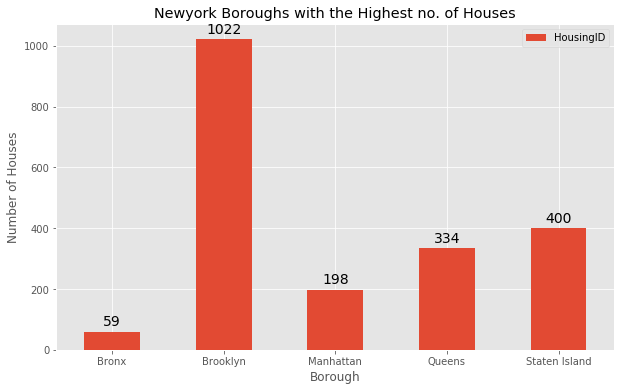

In [452]:
# df = df.loc['Borough','HousingID']

df.set_index('Borough',inplace = True)

ax = df.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Houses') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('Newyork Boroughs with the Highest no. of Houses') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

**NUMBER OF HOUSE WITH EACH CATEGORY** 

In [453]:
df1=pd.DataFrame(newyork1.BUILDING_CLASS_CATEGORY.value_counts(),index=None)
df1

,BUILDING_CLASS_CATEGORY
13 CONDOS - ELEVATOR APARTMENTS,895
15 CONDOS - 2-10 UNIT RESIDENTIAL,295
02 TWO FAMILY DWELLINGS,244
01 ONE FAMILY DWELLINGS,226
04 TAX CLASS 1 CONDOS,128
44 CONDO PARKING,48
12 CONDOS - WALKUP APARTMENTS,45
03 THREE FAMILY DWELLINGS,30
08 RENTALS - ELEVATOR APARTMENTS,14
07 RENTALS - WALKUP APARTMENTS,14


### **Use geopy library to get the latitude and longitude values of New York City**

---


In [454]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


## Create a map of New York with neighborhoods superimposed on top

In [455]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

# EXPLORING NEIGHBORHOOD OF MANHATTAN BOROUGH IN NEWYORK

### Let's get the geographical coordinates of Manhattan.

In [456]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [457]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

In [458]:
manhattan_data = newyork1[newyork1['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,HousingID,Neighborhood,BUILDING_CLASS_CATEGORY,SALE_PRICE,YEAR_BUILT,Borough,Latitude,Longitude
0,238,CHELSEA,08 RENTALS - ELEVATOR APARTMENTS,4600000,2014,Manhattan,40.744035,-74.003116
1,243,CHELSEA,08 RENTALS - ELEVATOR APARTMENTS,2341975,2014,Manhattan,40.744035,-74.003116
2,499,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,3210237,2013,Manhattan,40.744035,-74.003116
3,500,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,5875000,2013,Manhattan,40.744035,-74.003116
4,501,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,44105000,2013,Manhattan,40.744035,-74.003116


## Define Foursquare Credentials and Version

In [466]:
CLIENT_ID = 'ULBTJZ3JTMGQTADKPZHXBTR1WZ0IPUBPST2Q2V2E3QHHKOO4' # your Foursquare ID
CLIENT_SECRET = 'AQDDV5GWVONLAR14U5I5MMGM1DB4AQIFIS5LJG4L0J0WFU2N' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ULBTJZ3JTMGQTADKPZHXBTR1WZ0IPUBPST2Q2V2E3QHHKOO4
CLIENT_SECRET:AQDDV5GWVONLAR14U5I5MMGM1DB4AQIFIS5LJG4L0J0WFU2N


## *Let's explore the first neighborhood in our dataframe.*

In [467]:
manhattan_data.loc[0, 'Neighborhood']

'CHELSEA'

In [468]:
neighborhood_latitude = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of CHELSEA are 40.744034706747975, -74.00311633472813.


In [469]:
# type your answer here
LIMIT = 25 # limit of number of venues returned by Foursquare API

radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=ULBTJZ3JTMGQTADKPZHXBTR1WZ0IPUBPST2Q2V2E3QHHKOO4&client_secret=AQDDV5GWVONLAR14U5I5MMGM1DB4AQIFIS5LJG4L0J0WFU2N&v=20180605&ll=40.744034706747975,-74.00311633472813&radius=500&limit=25'

In [0]:
results = requests.get(url).json()

#**Explore Neighborhoods in Manhattan**
### Let's create a function to repeat the same process to all the neighborhoods in Manhattan

In [0]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [472]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Milk & Hops Chelsea,Beer Bar,40.744751,-74.002595
1,Bathtub Gin,Speakeasy,40.743638,-74.003290
2,TAO Downtown,Asian Restaurant,40.742545,-74.003837
3,Atlantic Theater Company (Linda Gross Theater),Theater,40.743953,-74.001476
4,Dil-e Punjab Deli,Indian Restaurant,40.744845,-74.002528


In [473]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

25 venues were returned by Foursquare.


In [0]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now write the code to run the above function on each neighborhood and create a new dataframe called manhattan_venues.

In [475]:
# type your answer here

manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CHELSEA
CIVIC CENTER
CIVIC CENTER
CIVIC CENTER
CIVIC CENTER
CIVIC CENTER
CLINTON
CLINTON
CLINTON
CLINTON
CLINTON
CLINTON
CLINTON
CLINTON
CLINTON
CLINTON
CLINTON
CLINTON
EAST VILLAGE
EAST VILLAGE
EAST VILLAGE
EAST VILLAGE
EAST VILLAGE
EAST VILLAGE
EAST VILLAGE
EAST VILLAGE
EAST VILLAGE
EAST VILLAGE
FLATIRON
FLATIRON
FLATIRON
FLATIRON
FLATIRON
FLATIRON
FLATIRON
FLATIRON
FLATIRON
FLATIRON
FLATIRON
FLATIRON
FLATIRON
FLATIRON
FLATIRON
FLATIRON
FLATIRON
FLATIRON
FLATIRON
FLATIRON
FLATIRON
FLATIRON
FLATIRON
FLATIRON
FLATIRON
FLATIRON
FLATIRON
FLATIRON
FLATIRON
FLATIRON
FLATIRON
FLATIRON
FLATIRON
FLATIRON
FLATIRON
FL

Let's check how many venues were returned for each neighborhood

In [476]:
print(manhattan_venues.shape)
manhattan_venues.head()

(4950, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,CHELSEA,40.744035,-74.003116,Milk & Hops Chelsea,40.744751,-74.002595,Beer Bar
1,CHELSEA,40.744035,-74.003116,Bathtub Gin,40.743638,-74.003290,Speakeasy
2,CHELSEA,40.744035,-74.003116,TAO Downtown,40.742545,-74.003837,Asian Restaurant
3,CHELSEA,40.744035,-74.003116,Atlantic Theater Company (Linda Gross Theater),40.743953,-74.001476,Theater
4,CHELSEA,40.744035,-74.003116,Dil-e Punjab Deli,40.744845,-74.002528,Indian Restaurant


In [477]:
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
CHELSEA,1225,1225,1225,1225,1225,1225
CIVIC CENTER,125,125,125,125,125,125
CLINTON,300,300,300,300,300,300
EAST VILLAGE,250,250,250,250,250,250
FLATIRON,1175,1175,1175,1175,1175,1175
GRAMERCY,125,125,125,125,125,125
INWOOD,25,25,25,25,25,25
LITTLE ITALY,75,75,75,75,75,75
LOWER EAST SIDE,200,200,200,200,200,200


In [478]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 137 uniques categories.


In [479]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bagel Shop,Bakery,Bar,Baseball Field,Beer Bar,Beer Store,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Bubble Tea Shop,Building,Burger Joint,Café,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Dog Run,Donut Shop,Falafel Restaurant,Farmers Market,Filipino Restaurant,Fish Market,Food Truck,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,General Entertainment,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hawaiian Restaurant,Health Food Store,History Museum,Hostel,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewish Restaurant,Juice Bar,Karaoke Bar,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Liquor Store,Lounge,Martial Arts Dojo,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Miscellaneous Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Nail Salon,New American Restaurant,Nightclub,Noodle House,Optical Shop,Outdoors & Recreation,Park,Performing Arts Venue,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Poke Place,Ramen Restaurant,Residential Building (Apartment / Condo),Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,School,Shanghai Restaurant,Shoe Store,Snack Place,Soccer Field,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Vegetarian / Vegan Restaurant,Veterinarian,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,CHELSEA,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,CHELSEA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CHELSEA,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,CHELSEA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,CHELSEA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [480]:
manhattan_onehot.shape

(4950, 138)

In [481]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bagel Shop,Bakery,Bar,Baseball Field,Beer Bar,Beer Store,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Bubble Tea Shop,Building,Burger Joint,Café,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Dog Run,Donut Shop,Falafel Restaurant,Farmers Market,Filipino Restaurant,Fish Market,Food Truck,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,General Entertainment,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hawaiian Restaurant,Health Food Store,History Museum,Hostel,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewish Restaurant,Juice Bar,Karaoke Bar,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Liquor Store,Lounge,Martial Arts Dojo,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Miscellaneous Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Nail Salon,New American Restaurant,Nightclub,Noodle House,Optical Shop,Outdoors & Recreation,Park,Performing Arts Venue,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Poke Place,Ramen Restaurant,Residential Building (Apartment / Condo),Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,School,Shanghai Restaurant,Shoe Store,Snack Place,Soccer Field,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Vegetarian / Vegan Restaurant,Veterinarian,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,CHELSEA,0.04,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.04,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.04,0.00,0.00,0.04,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.00,0.04,0.00,0.00,0.08,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.04,0.00,0.00,0.08,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,CIVIC CENTER,0.04,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,0.00,0.00,0.04,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.04,0.00,0.00,0.00,0.04,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.04,0.00,0.00,0.00,0.00,0.04,0.04,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04
2,CLINTON,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.04,0.00,0.00,0.00,0.00,0.04,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.00,0.00,0.04,0.00,0.00,0.00,0.08,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.04,0.00,0.00,0.00,0.04,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

In [482]:
manhattan_grouped.shape

(14, 138)

In [483]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----CHELSEA----
                 venue  freq
0                Hotel  0.12
1   Italian Restaurant  0.08
2              Theater  0.08
3  American Restaurant  0.04
4     Tapas Restaurant  0.04


----CIVIC CENTER----
                  venue  freq
0    Falafel Restaurant  0.08
1                   Spa  0.08
2  Gym / Fitness Center  0.08
3           Coffee Shop  0.08
4   American Restaurant  0.04


----CLINTON----
                  venue  freq
0  Gym / Fitness Center  0.12
1               Theater  0.12
2                 Hotel  0.08
3                  Café  0.04
4          Cocktail Bar  0.04


----EAST VILLAGE----
                   venue  freq
0            Coffee Shop  0.08
1  Vietnamese Restaurant  0.08
2            Pizza Place  0.08
3    American Restaurant  0.04
4                   Park  0.04


----FLATIRON----
                    venue  freq
0     Japanese Restaurant  0.12
1            Cycle Studio  0.12
2               Wine Shop  0.08
3    Gym / Fitness Center  0.08
4  Furniture / Home S

In [0]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [485]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,CHELSEA,Hotel,Italian Restaurant,Theater,Sushi Restaurant,Indian Restaurant,French Restaurant,New American Restaurant,Nightclub,Fish Market,Japanese Restaurant
1,CIVIC CENTER,Gym / Fitness Center,Coffee Shop,Falafel Restaurant,Spa,Yoga Studio,Nail Salon,Monument / Landmark,Molecular Gastronomy Restaurant,Medical Center,Martial Arts Dojo
2,CLINTON,Theater,Gym / Fitness Center,Hotel,Indie Theater,Supermarket,Pie Shop,Pizza Place,Park,Comedy Club,Cocktail Bar
3,EAST VILLAGE,Vietnamese Restaurant,Pizza Place,Coffee Shop,American Restaurant,Swiss Restaurant,Pet Café,Park,Dessert Shop,Moroccan Restaurant,Scandinavian Restaurant
4,FLATIRON,Japanese Restaurant,Cycle Studio,Wine Shop,Gym / Fitness Center,Furniture / Home Store,Sports Club,Women's Store,Gym,Miscellaneous Shop,Donut Shop


# **Cluster Neighborhoods**




In [486]:
# set number of clusters
kclusters = 10

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 2, 4, 1, 8, 5, 7, 9, 6, 1], dtype=int32)

In [487]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,HousingID,Neighborhood,BUILDING_CLASS_CATEGORY,SALE_PRICE,YEAR_BUILT,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,238,CHELSEA,08 RENTALS - ELEVATOR APARTMENTS,4600000,2014,Manhattan,40.744035,-74.003116,3,Hotel,Italian Restaurant,Theater,Sushi Restaurant,Indian Restaurant,French Restaurant,New American Restaurant,Nightclub,Fish Market,Japanese Restaurant
1,243,CHELSEA,08 RENTALS - ELEVATOR APARTMENTS,2341975,2014,Manhattan,40.744035,-74.003116,3,Hotel,Italian Restaurant,Theater,Sushi Restaurant,Indian Restaurant,French Restaurant,New American Restaurant,Nightclub,Fish Market,Japanese Restaurant
2,499,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,3210237,2013,Manhattan,40.744035,-74.003116,3,Hotel,Italian Restaurant,Theater,Sushi Restaurant,Indian Restaurant,French Restaurant,New American Restaurant,Nightclub,Fish Market,Japanese Restaurant
3,500,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,5875000,2013,Manhattan,40.744035,-74.003116,3,Hotel,Italian Restaurant,Theater,Sushi Restaurant,Indian Restaurant,French Restaurant,New American Restaurant,Nightclub,Fish Market,Japanese Restaurant
4,501,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,44105000,2013,Manhattan,40.744035,-74.003116,3,Hotel,Italian Restaurant,Theater,Sushi Restaurant,Indian Restaurant,French Restaurant,New American Restaurant,Nightclub,Fish Market,Japanese Restaurant


## **Visualizing the Cluster**

In [488]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## **Examine Clusters**

# **Cluster 0** 





In [505]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(manhattan_merged.shape[1]))]]

,Neighborhood,HousingID,Neighborhood,BUILDING_CLASS_CATEGORY,SALE_PRICE,YEAR_BUILT,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
154,SOHO,10702,SOHO,13 CONDOS - ELEVATOR APARTMENTS,26948580,2013,Manhattan,40.722184,-74.000657,0,Women's Store,Clothing Store,Shoe Store,Men's Store,Yoga Studio,Supermarket,Dessert Shop,Dance Studio,Cycle Studio,Cupcake Shop
155,SOHO,10703,SOHO,13 CONDOS - ELEVATOR APARTMENTS,4200000,2013,Manhattan,40.722184,-74.000657,0,Women's Store,Clothing Store,Shoe Store,Men's Store,Yoga Studio,Supermarket,Dessert Shop,Dance Studio,Cycle Studio,Cupcake Shop
156,SOHO,10704,SOHO,13 CONDOS - ELEVATOR APARTMENTS,3725000,2013,Manhattan,40.722184,-74.000657,0,Women's Store,Clothing Store,Shoe Store,Men's Store,Yoga Studio,Supermarket,Dessert Shop,Dance Studio,Cycle Studio,Cupcake Shop
157,SOHO,10705,SOHO,13 CONDOS - ELEVATOR APARTMENTS,2462265,2013,Manhattan,40.722184,-74.000657,0,Women's Store,Clothing Store,Shoe Store,Men's Store,Yoga Studio,Supermarket,Dessert Shop,Dance Studio,Cycle Studio,Cupcake Shop
158,SOHO,10706,SOHO,13 CONDOS - ELEVATOR APARTMENTS,4350000,2013,Manhattan,40.722184,-74.000657,0,Women's Store,Clothing Store,Shoe Store,Men's Store,Yoga Studio,Supermarket,Dessert Shop,Dance Studio,Cycle Studio,Cupcake Shop
159,SOHO,10707,SOHO,13 CONDOS - ELEVATOR APARTMENTS,3850000,2013,Manhattan,40.722184,-74.000657,0,Women's Store,Clothing Store,Shoe Store,Men's Store,Yoga Studio,Supermarket,Dessert Shop,Dance Studio,Cycle Studio,Cupcake Shop
160,SOHO,10708,SOHO,13 CONDOS - ELEVATOR APARTMENTS,2490000,2013,Manhattan,40.722184,-74.000657,0,Women's Store,Clothing Store,Shoe Store,Men's Store,Yoga Studio,Supermarket,Dessert Shop,Dance Studio,Cycle Studio,Cupcake Shop
161,SOHO,10709,SOHO,13 CONDOS - ELEVATOR APARTMENTS,4549716,2013,Manhattan,40.722184,-74.000657,0,Women's Store,Clothing Store,Shoe Store,Men's Store,Yoga Studio,Supermarket,Dessert Shop,Dance Studio,Cycle Studio,Cupcake Shop
162,SOHO,10710,SOHO,13 CONDOS - ELEVATOR APARTMENTS,3971175,2013,Manhattan,40.722184,-74.000657,0,Women's Store,Clothing Store,Shoe Store,Men's Store,Yoga Studio,Supermarket,Dessert Shop,Dance Studio,Cycle Studio,Cupcake Shop
163,SOHO,10711,SOHO,13 CONDOS - ELEVATOR APARTMENTS,2545625,2013,Manhattan,40.722184,-74.000657,0,Women's Store,Clothing Store,Shoe Store,Men's Store,Yoga Studio,Supermarket,Dessert Shop,Dance Studio,Cycle Studio,Cupcake Shop


# **Cluster 1**

In [506]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(manhattan_merged.shape[1]))]]

,Neighborhood,HousingID,Neighborhood,BUILDING_CLASS_CATEGORY,SALE_PRICE,YEAR_BUILT,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
66,EAST VILLAGE,1913,EAST VILLAGE,13 CONDOS - ELEVATOR APARTMENTS,1050000,2012,Manhattan,40.727847,-73.982226,1,Vietnamese Restaurant,Pizza Place,Coffee Shop,American Restaurant,Swiss Restaurant,Pet Café,Park,Dessert Shop,Moroccan Restaurant,Scandinavian Restaurant
67,EAST VILLAGE,1914,EAST VILLAGE,13 CONDOS - ELEVATOR APARTMENTS,1700000,2012,Manhattan,40.727847,-73.982226,1,Vietnamese Restaurant,Pizza Place,Coffee Shop,American Restaurant,Swiss Restaurant,Pet Café,Park,Dessert Shop,Moroccan Restaurant,Scandinavian Restaurant
68,EAST VILLAGE,1915,EAST VILLAGE,13 CONDOS - ELEVATOR APARTMENTS,2600000,2012,Manhattan,40.727847,-73.982226,1,Vietnamese Restaurant,Pizza Place,Coffee Shop,American Restaurant,Swiss Restaurant,Pet Café,Park,Dessert Shop,Moroccan Restaurant,Scandinavian Restaurant
69,EAST VILLAGE,1916,EAST VILLAGE,13 CONDOS - ELEVATOR APARTMENTS,1050000,2012,Manhattan,40.727847,-73.982226,1,Vietnamese Restaurant,Pizza Place,Coffee Shop,American Restaurant,Swiss Restaurant,Pet Café,Park,Dessert Shop,Moroccan Restaurant,Scandinavian Restaurant
70,EAST VILLAGE,1917,EAST VILLAGE,13 CONDOS - ELEVATOR APARTMENTS,2450000,2012,Manhattan,40.727847,-73.982226,1,Vietnamese Restaurant,Pizza Place,Coffee Shop,American Restaurant,Swiss Restaurant,Pet Café,Park,Dessert Shop,Moroccan Restaurant,Scandinavian Restaurant
71,EAST VILLAGE,1918,EAST VILLAGE,13 CONDOS - ELEVATOR APARTMENTS,2521695,2012,Manhattan,40.727847,-73.982226,1,Vietnamese Restaurant,Pizza Place,Coffee Shop,American Restaurant,Swiss Restaurant,Pet Café,Park,Dessert Shop,Moroccan Restaurant,Scandinavian Restaurant
72,EAST VILLAGE,1920,EAST VILLAGE,13 CONDOS - ELEVATOR APARTMENTS,4200000,2012,Manhattan,40.727847,-73.982226,1,Vietnamese Restaurant,Pizza Place,Coffee Shop,American Restaurant,Swiss Restaurant,Pet Café,Park,Dessert Shop,Moroccan Restaurant,Scandinavian Restaurant
73,EAST VILLAGE,1936,EAST VILLAGE,15 CONDOS - 2-10 UNIT RESIDENTIAL,6155662,2015,Manhattan,40.727847,-73.982226,1,Vietnamese Restaurant,Pizza Place,Coffee Shop,American Restaurant,Swiss Restaurant,Pet Café,Park,Dessert Shop,Moroccan Restaurant,Scandinavian Restaurant
74,EAST VILLAGE,1937,EAST VILLAGE,15 CONDOS - 2-10 UNIT RESIDENTIAL,16200000,2015,Manhattan,40.727847,-73.982226,1,Vietnamese Restaurant,Pizza Place,Coffee Shop,American Restaurant,Swiss Restaurant,Pet Café,Park,Dessert Shop,Moroccan Restaurant,Scandinavian Restaurant
75,EAST VILLAGE,1939,EAST VILLAGE,16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT,20302500,2015,Manhattan,40.727847,-73.982226,1,Vietnamese Restaurant,Pizza Place,Coffee Shop,American Restaurant,Swiss Restaurant,Pet Café,Park,Dessert Shop,Moroccan Restaurant,Scandinavian Restaurant


# **Cluster 2**

In [507]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(manhattan_merged.shape[1]))]]

,Neighborhood,HousingID,Neighborhood,BUILDING_CLASS_CATEGORY,SALE_PRICE,YEAR_BUILT,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
49,CIVIC CENTER,1295,CIVIC CENTER,13 CONDOS - ELEVATOR APARTMENTS,2800000,2010,Manhattan,40.715229,-74.005415,2,Gym / Fitness Center,Coffee Shop,Falafel Restaurant,Spa,Yoga Studio,Nail Salon,Monument / Landmark,Molecular Gastronomy Restaurant,Medical Center,Martial Arts Dojo
50,CIVIC CENTER,1296,CIVIC CENTER,13 CONDOS - ELEVATOR APARTMENTS,2498000,2010,Manhattan,40.715229,-74.005415,2,Gym / Fitness Center,Coffee Shop,Falafel Restaurant,Spa,Yoga Studio,Nail Salon,Monument / Landmark,Molecular Gastronomy Restaurant,Medical Center,Martial Arts Dojo
51,CIVIC CENTER,1297,CIVIC CENTER,13 CONDOS - ELEVATOR APARTMENTS,2525000,2010,Manhattan,40.715229,-74.005415,2,Gym / Fitness Center,Coffee Shop,Falafel Restaurant,Spa,Yoga Studio,Nail Salon,Monument / Landmark,Molecular Gastronomy Restaurant,Medical Center,Martial Arts Dojo
52,CIVIC CENTER,1298,CIVIC CENTER,13 CONDOS - ELEVATOR APARTMENTS,1225000,2010,Manhattan,40.715229,-74.005415,2,Gym / Fitness Center,Coffee Shop,Falafel Restaurant,Spa,Yoga Studio,Nail Salon,Monument / Landmark,Molecular Gastronomy Restaurant,Medical Center,Martial Arts Dojo
53,CIVIC CENTER,1438,CIVIC CENTER,44 CONDO PARKING,202560,2013,Manhattan,40.715229,-74.005415,2,Gym / Fitness Center,Coffee Shop,Falafel Restaurant,Spa,Yoga Studio,Nail Salon,Monument / Landmark,Molecular Gastronomy Restaurant,Medical Center,Martial Arts Dojo
153,ROOSEVELT ISLAND,10524,ROOSEVELT ISLAND,11A CONDO-RENTALS,23296741,2014,Manhattan,40.762160,-73.949168,2,Park,Sandwich Place,Gym / Fitness Center,Deli / Bodega,Outdoors & Recreation,Pizza Place,Indie Theater,Plaza,Farmers Market,Residential Building (Apartment / Condo)
194,TRIBECA,11472,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,7400000,2013,Manhattan,40.721522,-74.010683,2,American Restaurant,Park,Gym Pool,Poke Place,Playground,Men's Store,Italian Restaurant,Indie Theater,Hotel,Greek Restaurant
195,TRIBECA,11473,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,4650000,2013,Manhattan,40.721522,-74.010683,2,American Restaurant,Park,Gym Pool,Poke Place,Playground,Men's Store,Italian Restaurant,Indie Theater,Hotel,Greek Restaurant
196,TRIBECA,11474,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,8750000,2013,Manhattan,40.721522,-74.010683,2,American Restaurant,Park,Gym Pool,Poke Place,Playground,Men's Store,Italian Restaurant,Indie Theater,Hotel,Greek Restaurant
197,TRIBECA,11538,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2950000,2010,Manhattan,40.721522,-74.010683,2,American Restaurant,Park,Gym Pool,Poke Place,Playground,Men's Store,Italian Restaurant,Indie Theater,Hotel,Greek Restaurant


# **Cluster 3**

In [508]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range( manhattan_merged.shape[1]))]]

,Neighborhood,HousingID,Neighborhood,BUILDING_CLASS_CATEGORY,SALE_PRICE,YEAR_BUILT,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,CHELSEA,238,CHELSEA,08 RENTALS - ELEVATOR APARTMENTS,4600000,2014,Manhattan,40.744035,-74.003116,3,Hotel,Italian Restaurant,Theater,Sushi Restaurant,Indian Restaurant,French Restaurant,New American Restaurant,Nightclub,Fish Market,Japanese Restaurant
1,CHELSEA,243,CHELSEA,08 RENTALS - ELEVATOR APARTMENTS,2341975,2014,Manhattan,40.744035,-74.003116,3,Hotel,Italian Restaurant,Theater,Sushi Restaurant,Indian Restaurant,French Restaurant,New American Restaurant,Nightclub,Fish Market,Japanese Restaurant
2,CHELSEA,499,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,3210237,2013,Manhattan,40.744035,-74.003116,3,Hotel,Italian Restaurant,Theater,Sushi Restaurant,Indian Restaurant,French Restaurant,New American Restaurant,Nightclub,Fish Market,Japanese Restaurant
3,CHELSEA,500,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,5875000,2013,Manhattan,40.744035,-74.003116,3,Hotel,Italian Restaurant,Theater,Sushi Restaurant,Indian Restaurant,French Restaurant,New American Restaurant,Nightclub,Fish Market,Japanese Restaurant
4,CHELSEA,501,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,44105000,2013,Manhattan,40.744035,-74.003116,3,Hotel,Italian Restaurant,Theater,Sushi Restaurant,Indian Restaurant,French Restaurant,New American Restaurant,Nightclub,Fish Market,Japanese Restaurant
5,CHELSEA,502,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,4650000,2013,Manhattan,40.744035,-74.003116,3,Hotel,Italian Restaurant,Theater,Sushi Restaurant,Indian Restaurant,French Restaurant,New American Restaurant,Nightclub,Fish Market,Japanese Restaurant
6,CHELSEA,504,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2685000,2013,Manhattan,40.744035,-74.003116,3,Hotel,Italian Restaurant,Theater,Sushi Restaurant,Indian Restaurant,French Restaurant,New American Restaurant,Nightclub,Fish Market,Japanese Restaurant
7,CHELSEA,505,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,15350000,2013,Manhattan,40.744035,-74.003116,3,Hotel,Italian Restaurant,Theater,Sushi Restaurant,Indian Restaurant,French Restaurant,New American Restaurant,Nightclub,Fish Market,Japanese Restaurant
8,CHELSEA,507,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,14650000,2013,Manhattan,40.744035,-74.003116,3,Hotel,Italian Restaurant,Theater,Sushi Restaurant,Indian Restaurant,French Restaurant,New American Restaurant,Nightclub,Fish Market,Japanese Restaurant
9,CHELSEA,510,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2760000,2013,Manhattan,40.744035,-74.003116,3,Hotel,Italian Restaurant,Theater,Sushi Restaurant,Indian Restaurant,French Restaurant,New American Restaurant,Nightclub,Fish Market,Japanese Restaurant


# **Cluster 4**

In [509]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range( manhattan_merged.shape[1]))]]

,Neighborhood,HousingID,Neighborhood,BUILDING_CLASS_CATEGORY,SALE_PRICE,YEAR_BUILT,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
54,CLINTON,1467,CLINTON,08 RENTALS - ELEVATOR APARTMENTS,15093194,2016,Manhattan,40.759101,-73.996119,4,Theater,Gym / Fitness Center,Hotel,Indie Theater,Supermarket,Pie Shop,Pizza Place,Park,Comedy Club,Cocktail Bar
55,CLINTON,1718,CLINTON,13 CONDOS - ELEVATOR APARTMENTS,10,2013,Manhattan,40.759101,-73.996119,4,Theater,Gym / Fitness Center,Hotel,Indie Theater,Supermarket,Pie Shop,Pizza Place,Park,Comedy Club,Cocktail Bar
56,CLINTON,1719,CLINTON,13 CONDOS - ELEVATOR APARTMENTS,1374637,2013,Manhattan,40.759101,-73.996119,4,Theater,Gym / Fitness Center,Hotel,Indie Theater,Supermarket,Pie Shop,Pizza Place,Park,Comedy Club,Cocktail Bar
57,CLINTON,1721,CLINTON,13 CONDOS - ELEVATOR APARTMENTS,2341975,2013,Manhattan,40.759101,-73.996119,4,Theater,Gym / Fitness Center,Hotel,Indie Theater,Supermarket,Pie Shop,Pizza Place,Park,Comedy Club,Cocktail Bar
58,CLINTON,1722,CLINTON,13 CONDOS - ELEVATOR APARTMENTS,2341975,2013,Manhattan,40.759101,-73.996119,4,Theater,Gym / Fitness Center,Hotel,Indie Theater,Supermarket,Pie Shop,Pizza Place,Park,Comedy Club,Cocktail Bar
59,CLINTON,1723,CLINTON,13 CONDOS - ELEVATOR APARTMENTS,1209936,2013,Manhattan,40.759101,-73.996119,4,Theater,Gym / Fitness Center,Hotel,Indie Theater,Supermarket,Pie Shop,Pizza Place,Park,Comedy Club,Cocktail Bar
60,CLINTON,1724,CLINTON,13 CONDOS - ELEVATOR APARTMENTS,753300,2013,Manhattan,40.759101,-73.996119,4,Theater,Gym / Fitness Center,Hotel,Indie Theater,Supermarket,Pie Shop,Pizza Place,Park,Comedy Club,Cocktail Bar
61,CLINTON,1725,CLINTON,13 CONDOS - ELEVATOR APARTMENTS,1780000,2013,Manhattan,40.759101,-73.996119,4,Theater,Gym / Fitness Center,Hotel,Indie Theater,Supermarket,Pie Shop,Pizza Place,Park,Comedy Club,Cocktail Bar
62,CLINTON,1726,CLINTON,13 CONDOS - ELEVATOR APARTMENTS,1135000,2013,Manhattan,40.759101,-73.996119,4,Theater,Gym / Fitness Center,Hotel,Indie Theater,Supermarket,Pie Shop,Pizza Place,Park,Comedy Club,Cocktail Bar
63,CLINTON,1727,CLINTON,13 CONDOS - ELEVATOR APARTMENTS,2189237,2013,Manhattan,40.759101,-73.996119,4,Theater,Gym / Fitness Center,Hotel,Indie Theater,Supermarket,Pie Shop,Pizza Place,Park,Comedy Club,Cocktail Bar


# **Cluster 5**

In [510]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 5, manhattan_merged.columns[[1] + list(range( manhattan_merged.shape[1]))]]

,Neighborhood,HousingID,Neighborhood,BUILDING_CLASS_CATEGORY,SALE_PRICE,YEAR_BUILT,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
123,GRAMERCY,3417,GRAMERCY,13 CONDOS - ELEVATOR APARTMENTS,2425000,2012,Manhattan,40.73721,-73.981376,5,Pizza Place,Thrift / Vintage Store,Coffee Shop,Spa,Hotel,Mexican Restaurant,Liquor Store,Italian Restaurant,Irish Pub,Yoga Studio
124,GRAMERCY,3418,GRAMERCY,13 CONDOS - ELEVATOR APARTMENTS,1750000,2012,Manhattan,40.73721,-73.981376,5,Pizza Place,Thrift / Vintage Store,Coffee Shop,Spa,Hotel,Mexican Restaurant,Liquor Store,Italian Restaurant,Irish Pub,Yoga Studio
125,GRAMERCY,3419,GRAMERCY,13 CONDOS - ELEVATOR APARTMENTS,3229000,2012,Manhattan,40.73721,-73.981376,5,Pizza Place,Thrift / Vintage Store,Coffee Shop,Spa,Hotel,Mexican Restaurant,Liquor Store,Italian Restaurant,Irish Pub,Yoga Studio
126,GRAMERCY,3436,GRAMERCY,13 CONDOS - ELEVATOR APARTMENTS,2995000,2013,Manhattan,40.73721,-73.981376,5,Pizza Place,Thrift / Vintage Store,Coffee Shop,Spa,Hotel,Mexican Restaurant,Liquor Store,Italian Restaurant,Irish Pub,Yoga Studio
127,GRAMERCY,3479,GRAMERCY,13 CONDOS - ELEVATOR APARTMENTS,2400000,2014,Manhattan,40.73721,-73.981376,5,Pizza Place,Thrift / Vintage Store,Coffee Shop,Spa,Hotel,Mexican Restaurant,Liquor Store,Italian Restaurant,Irish Pub,Yoga Studio


# **Cluster 6**

In [511]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 6, manhattan_merged.columns[[1] + list(range( manhattan_merged.shape[1]))]]

,Neighborhood,HousingID,Neighborhood,BUILDING_CLASS_CATEGORY,SALE_PRICE,YEAR_BUILT,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
132,LOWER EAST SIDE,6760,LOWER EAST SIDE,08 RENTALS - ELEVATOR APARTMENTS,61500000,2014,Manhattan,40.717807,-73.98089,6,Art Gallery,Cocktail Bar,Coffee Shop,Japanese Restaurant,Yoga Studio,Pet Café,Shoe Store,Chinese Restaurant,Clothing Store,Performing Arts Venue
133,LOWER EAST SIDE,6761,LOWER EAST SIDE,08 RENTALS - ELEVATOR APARTMENTS,21200000,2013,Manhattan,40.717807,-73.98089,6,Art Gallery,Cocktail Bar,Coffee Shop,Japanese Restaurant,Yoga Studio,Pet Café,Shoe Store,Chinese Restaurant,Clothing Store,Performing Arts Venue
134,LOWER EAST SIDE,6953,LOWER EAST SIDE,13 CONDOS - ELEVATOR APARTMENTS,600000,2010,Manhattan,40.717807,-73.98089,6,Art Gallery,Cocktail Bar,Coffee Shop,Japanese Restaurant,Yoga Studio,Pet Café,Shoe Store,Chinese Restaurant,Clothing Store,Performing Arts Venue
135,LOWER EAST SIDE,6954,LOWER EAST SIDE,13 CONDOS - ELEVATOR APARTMENTS,600000,2010,Manhattan,40.717807,-73.98089,6,Art Gallery,Cocktail Bar,Coffee Shop,Japanese Restaurant,Yoga Studio,Pet Café,Shoe Store,Chinese Restaurant,Clothing Store,Performing Arts Venue
136,LOWER EAST SIDE,6955,LOWER EAST SIDE,13 CONDOS - ELEVATOR APARTMENTS,600000,2010,Manhattan,40.717807,-73.98089,6,Art Gallery,Cocktail Bar,Coffee Shop,Japanese Restaurant,Yoga Studio,Pet Café,Shoe Store,Chinese Restaurant,Clothing Store,Performing Arts Venue
137,LOWER EAST SIDE,6969,LOWER EAST SIDE,13 CONDOS - ELEVATOR APARTMENTS,1781937,2015,Manhattan,40.717807,-73.98089,6,Art Gallery,Cocktail Bar,Coffee Shop,Japanese Restaurant,Yoga Studio,Pet Café,Shoe Store,Chinese Restaurant,Clothing Store,Performing Arts Venue
138,LOWER EAST SIDE,7031,LOWER EAST SIDE,43 CONDO OFFICE BUILDINGS,4121000,2011,Manhattan,40.717807,-73.98089,6,Art Gallery,Cocktail Bar,Coffee Shop,Japanese Restaurant,Yoga Studio,Pet Café,Shoe Store,Chinese Restaurant,Clothing Store,Performing Arts Venue
139,LOWER EAST SIDE,7042,LOWER EAST SIDE,46 CONDO STORE BUILDINGS,1102367,2011,Manhattan,40.717807,-73.98089,6,Art Gallery,Cocktail Bar,Coffee Shop,Japanese Restaurant,Yoga Studio,Pet Café,Shoe Store,Chinese Restaurant,Clothing Store,Performing Arts Venue


# **Cluster 7**

In [512]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 7, manhattan_merged.columns[[1] + list(range( manhattan_merged.shape[1]))]]

,Neighborhood,HousingID,Neighborhood,BUILDING_CLASS_CATEGORY,SALE_PRICE,YEAR_BUILT,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
128,INWOOD,6199,INWOOD,08 RENTALS - ELEVATOR APARTMENTS,1,2013,Manhattan,40.867684,-73.92121,7,Bakery,Wine Bar,Café,Deli / Bodega,Mexican Restaurant,Park,Yoga Studio,Spanish Restaurant,Bistro,Diner


# **Cluster 8**

In [513]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 8, manhattan_merged.columns[[1] + list(range( manhattan_merged.shape[1]))]]

,Neighborhood,HousingID,Neighborhood,BUILDING_CLASS_CATEGORY,SALE_PRICE,YEAR_BUILT,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
76,FLATIRON,2733,FLATIRON,13 CONDOS - ELEVATOR APARTMENTS,5702200,2012,Manhattan,40.739673,-73.990947,8,Japanese Restaurant,Cycle Studio,Wine Shop,Gym / Fitness Center,Furniture / Home Store,Sports Club,Women's Store,Gym,Miscellaneous Shop,Donut Shop
77,FLATIRON,2734,FLATIRON,13 CONDOS - ELEVATOR APARTMENTS,5500000,2012,Manhattan,40.739673,-73.990947,8,Japanese Restaurant,Cycle Studio,Wine Shop,Gym / Fitness Center,Furniture / Home Store,Sports Club,Women's Store,Gym,Miscellaneous Shop,Donut Shop
78,FLATIRON,2735,FLATIRON,13 CONDOS - ELEVATOR APARTMENTS,6213325,2012,Manhattan,40.739673,-73.990947,8,Japanese Restaurant,Cycle Studio,Wine Shop,Gym / Fitness Center,Furniture / Home Store,Sports Club,Women's Store,Gym,Miscellaneous Shop,Donut Shop
79,FLATIRON,2736,FLATIRON,13 CONDOS - ELEVATOR APARTMENTS,2055000,2012,Manhattan,40.739673,-73.990947,8,Japanese Restaurant,Cycle Studio,Wine Shop,Gym / Fitness Center,Furniture / Home Store,Sports Club,Women's Store,Gym,Miscellaneous Shop,Donut Shop
80,FLATIRON,2738,FLATIRON,13 CONDOS - ELEVATOR APARTMENTS,5396725,2012,Manhattan,40.739673,-73.990947,8,Japanese Restaurant,Cycle Studio,Wine Shop,Gym / Fitness Center,Furniture / Home Store,Sports Club,Women's Store,Gym,Miscellaneous Shop,Donut Shop
81,FLATIRON,2739,FLATIRON,13 CONDOS - ELEVATOR APARTMENTS,5700000,2012,Manhattan,40.739673,-73.990947,8,Japanese Restaurant,Cycle Studio,Wine Shop,Gym / Fitness Center,Furniture / Home Store,Sports Club,Women's Store,Gym,Miscellaneous Shop,Donut Shop
82,FLATIRON,2742,FLATIRON,13 CONDOS - ELEVATOR APARTMENTS,1522283,2015,Manhattan,40.739673,-73.990947,8,Japanese Restaurant,Cycle Studio,Wine Shop,Gym / Fitness Center,Furniture / Home Store,Sports Club,Women's Store,Gym,Miscellaneous Shop,Donut Shop
83,FLATIRON,2743,FLATIRON,13 CONDOS - ELEVATOR APARTMENTS,1547729,2015,Manhattan,40.739673,-73.990947,8,Japanese Restaurant,Cycle Studio,Wine Shop,Gym / Fitness Center,Furniture / Home Store,Sports Club,Women's Store,Gym,Miscellaneous Shop,Donut Shop
84,FLATIRON,2744,FLATIRON,13 CONDOS - ELEVATOR APARTMENTS,2647450,2015,Manhattan,40.739673,-73.990947,8,Japanese Restaurant,Cycle Studio,Wine Shop,Gym / Fitness Center,Furniture / Home Store,Sports Club,Women's Store,Gym,Miscellaneous Shop,Donut Shop
85,FLATIRON,2745,FLATIRON,13 CONDOS - ELEVATOR APARTMENTS,1850000,2015,Manhattan,40.739673,-73.990947,8,Japanese Restaurant,Cycle Studio,Wine Shop,Gym / Fitness Center,Furniture / Home Store,Sports Club,Women's Store,Gym,Miscellaneous Shop,Donut Shop


# **Cluster 9**

In [514]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 9, manhattan_merged.columns[[1] + list(range(manhattan_merged.shape[1]))]]

,Neighborhood,HousingID,Neighborhood,BUILDING_CLASS_CATEGORY,SALE_PRICE,YEAR_BUILT,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
129,LITTLE ITALY,6709,LITTLE ITALY,13 CONDOS - ELEVATOR APARTMENTS,3350000,2012,Manhattan,40.719324,-73.997305,9,Café,Wine Bar,Sandwich Place,Clothing Store,Karaoke Bar,Gourmet Shop,Pizza Place,Optical Shop,Noodle House,Coffee Shop
130,LITTLE ITALY,6710,LITTLE ITALY,13 CONDOS - ELEVATOR APARTMENTS,6500000,2012,Manhattan,40.719324,-73.997305,9,Café,Wine Bar,Sandwich Place,Clothing Store,Karaoke Bar,Gourmet Shop,Pizza Place,Optical Shop,Noodle House,Coffee Shop
131,LITTLE ITALY,6724,LITTLE ITALY,13 CONDOS - ELEVATOR APARTMENTS,1200000,2010,Manhattan,40.719324,-73.997305,9,Café,Wine Bar,Sandwich Place,Clothing Store,Karaoke Bar,Gourmet Shop,Pizza Place,Optical Shop,Noodle House,Coffee Shop


# **HOUSES IN BRONX BOROUGH**

In [516]:
Bronx_data = newyork1[newyork1['Borough'] == 'Bronx'].reset_index(drop=True)
Bronx_data.head()

,HousingID,Neighborhood,BUILDING_CLASS_CATEGORY,SALE_PRICE,YEAR_BUILT,Borough,Latitude,Longitude
0,158,BAYCHESTER,01 ONE FAMILY DWELLINGS,515000,2015,Bronx,40.866858,-73.835798
1,334,BAYCHESTER,02 TWO FAMILY DWELLINGS,697501,2015,Bronx,40.866858,-73.835798
2,335,BAYCHESTER,02 TWO FAMILY DWELLINGS,697501,2015,Bronx,40.866858,-73.835798
3,385,BAYCHESTER,02 TWO FAMILY DWELLINGS,789000,2015,Bronx,40.866858,-73.835798
4,386,BAYCHESTER,02 TWO FAMILY DWELLINGS,789143,2015,Bronx,40.866858,-73.835798


In [517]:
address = 'Bronx, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bronx are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bronx are 40.8466508, -73.8785937.


# HOUSES IN QUEENS

In [518]:
Queens_data = newyork1[newyork1['Borough'] == 'Queens'].reset_index(drop=True)
Queens_data.head()

,HousingID,Neighborhood,BUILDING_CLASS_CATEGORY,SALE_PRICE,YEAR_BUILT,Borough,Latitude,Longitude
0,10189,MURRAY HILL,11A CONDO-RENTALS,3584743,2013,Queens,40.764126,-73.812763
1,10379,MURRAY HILL,13 CONDOS - ELEVATOR APARTMENTS,1350000,2013,Queens,40.764126,-73.812763
2,10380,MURRAY HILL,13 CONDOS - ELEVATOR APARTMENTS,998984,2013,Queens,40.764126,-73.812763
3,10382,MURRAY HILL,13 CONDOS - ELEVATOR APARTMENTS,1730000,2013,Queens,40.764126,-73.812763
4,10383,MURRAY HILL,13 CONDOS - ELEVATOR APARTMENTS,2039500,2013,Queens,40.764126,-73.812763


In [521]:
address = 'Queens, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Queens are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Queens are 40.7498243, -73.7976337.


# HOUSES IN BROOKLYN 

In [522]:
Brooklyn_data = newyork1[newyork1['Borough'] == 'Brooklyn'].reset_index(drop=True)
Brooklyn_data.head()

,HousingID,Neighborhood,BUILDING_CLASS_CATEGORY,SALE_PRICE,YEAR_BUILT,Borough,Latitude,Longitude
0,152,BATH BEACH,03 THREE FAMILY DWELLINGS,1616981,2014,Brooklyn,40.599519,-73.998752
1,153,BATH BEACH,03 THREE FAMILY DWELLINGS,1596616,2014,Brooklyn,40.599519,-73.998752
2,169,BATH BEACH,03 THREE FAMILY DWELLINGS,1456097,2016,Brooklyn,40.599519,-73.998752
3,170,BATH BEACH,03 THREE FAMILY DWELLINGS,1476462,2015,Brooklyn,40.599519,-73.998752
4,189,BATH BEACH,04 TAX CLASS 1 CONDOS,529490,2015,Brooklyn,40.599519,-73.998752


In [523]:
address = 'Brooklyn, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brooklyn are 40.6501038, -73.9495823.


# HOUSES IN STATEN ISLAND BOROUGH

In [524]:
Staten_Island_data = newyork1[newyork1['Borough'] == 'Staten Island'].reset_index(drop=True)
Staten_Island_data.head()

,HousingID,Neighborhood,BUILDING_CLASS_CATEGORY,SALE_PRICE,YEAR_BUILT,Borough,Latitude,Longitude
0,238,CHELSEA,08 RENTALS - ELEVATOR APARTMENTS,4600000,2014,Staten Island,40.594726,-74.18956
1,243,CHELSEA,08 RENTALS - ELEVATOR APARTMENTS,2341975,2014,Staten Island,40.594726,-74.18956
2,499,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,3210237,2013,Staten Island,40.594726,-74.18956
3,500,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,5875000,2013,Staten Island,40.594726,-74.18956
4,501,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,44105000,2013,Staten Island,40.594726,-74.18956


In [525]:
address = 'Staten Island, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Staten Island are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Staten Island are 40.5834557, -74.1496048.
